In [2]:
import pandas as pd
df = pd.read_csv('SMSSpam2.csv', index_col=0)
df=df
df.head()

,category,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


count    5572.000000
mean       80.490309
std        59.944527
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64
1085    For me the love should start with attraction.i...
Name: message, dtype: object


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E113373DC0>,
      dtype=object)

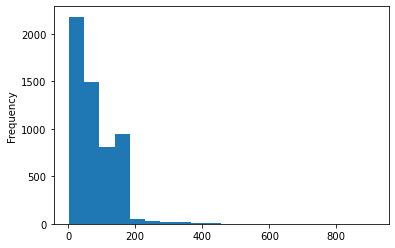

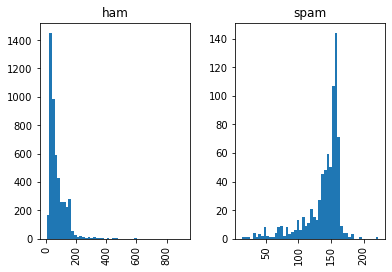

In [3]:
df['length'] = df['message'].map(lambda text: len(text))

df.length.plot(bins=20, kind='hist')
print(df.length.describe())

print(df.message[df.length > 900])

df.hist(column='length', by='category', bins=50)

In [4]:
groups = df.groupby('category')
words=[]
for key, data in groups :
    print(key)
    words.append(data.message.str.split(expand=True).stack().value_counts())

ham
spam


In [5]:
words

[to           1538
 you          1462
 I            1439
 the          1029
 a             977
              ... 
 ME!!            1
 Orchard         1
 Yest            1
 darlings!       1
 offer:)         1
 Length: 12583, dtype: int64,
 to         607
 a          360
 your       187
 call       185
 or         185
           ... 
 XXXX         1
 posh         1
 digital      1
 7,           1
 31           1
 Length: 4320, dtype: int64]

In [6]:
words_ham = set(words[0].index)
words_spam = set(words[1].index)
commun = words_ham & words_spam
ham = words_ham - commun
spam = words_spam - commun

In [7]:
list(spam)

['POBox',
 '9th',
 'FML,',
 '6WU',
 'Everyone',
 'BabyGoodbye',
 'advise',
 'more!',
 "George's",
 'fgkslpoPW',
 'SP',
 '5we.',
 '88877',
 'you!To',
 'SAE',
 '08002986030',
 'Questions:',
 'DoubleTxt',
 'Incorrect?',
 '09061749602',
 "me?'",
 'wither',
 'Adult',
 '140ppm',
 'promised',
 'M',
 '£1.50',
 '300%',
 'BOX95QU',
 '08700621170150p',
 'Nasdaq',
 'dogs',
 '08000938767',
 'PRICE',
 '£1.50/wk.',
 'glad,',
 'action.',
 'TheDailyDraw)',
 'DVD!',
 'Sppok',
 '8883',
 'ads',
 '61610',
 '24/10/04',
 'abuse???',
 'A-Green',
 'Nokia/150p',
 'MEMBERS',
 'recd@thirtyeight',
 'word:COLLECT',
 '0721072',
 '89555.',
 '5K,',
 'SUZY',
 'Strong-Buy)',
 '2optout/D3WV',
 'James',
 'Sky',
 '150p/Mt',
 'CHOSEN',
 '08712466669',
 'lnly',
 'dialling',
 'Cust',
 '86688',
 'Download',
 'Bob,',
 'Player',
 'info@txt82228.co.uk',
 'Drinks',
 '88039',
 '8WP',
 'SHOULD',
 'changed!',
 'bootydelious',
 'Delivery',
 'guaranteed',
 'Join.',
 'Co',
 'gr8prizes',
 'SLO(4msgs)',
 '3x£150pw',
 'XCHAT.',
 'Subscript

In [8]:
spamWords = words[1].loc[list(spam)]
spamWords = spamWords.sort_values(ascending=False)[spamWords>15]
spamWords

claim          73
won            45
prize          44
awarded        37
£1000          33
URGENT!        32
PO             31
Claim          30
150ppm         28
guaranteed     25
entry          25
4*             24
Box            23
500            23
£100           22
16+            22
18             22
Holiday        21
8007           21
weekly         20
£2000          20
Valid          20
tone           19
86688          19
150p           19
T&Cs           19
WON            19
GUARANTEED.    19
£5000          19
750            18
Orange         18
£500           18
land           18
tones          17
Expires        17
ringtone       17
landline.      17
12hrs          17
No:            17
£1.50          17
WIN            17
line.          17
Statement      16
Account        16
PRIVATE!       16
Todays         16
Identifier     16
NOW!           16
prize.         16
dtype: int64

In [9]:
for name in spamWords.index : 
    df[name]= df["message"].str.contains(name, case=False)
df.shape

(5572, 52)

In [10]:
from sklearn import preprocessing
df['length'] = preprocessing.scale(df['length'])
X = df.iloc[:,2:]
y = df['category']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [12]:
knn.score(X_test, y_test)

0.9461593682699211

In [13]:
# il faut faire ensuite la matrice de confusion etc...

TypeError: predict() takes 2 positional arguments but 3 were given